<a href="https://colab.research.google.com/github/omkenge/vanna.ai-demo/blob/main/VANNA_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vanna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
from sqlalchemy import create_engine

In [ ]:
from vanna.remote import VannaDefault

In [ ]:
vn=VannaDefault(model='chinook',api_key='')
vn.connect_to_sqlite('http://vanna.ai/Chinook.sqlite')

In [ ]:
from IPython.display import Image

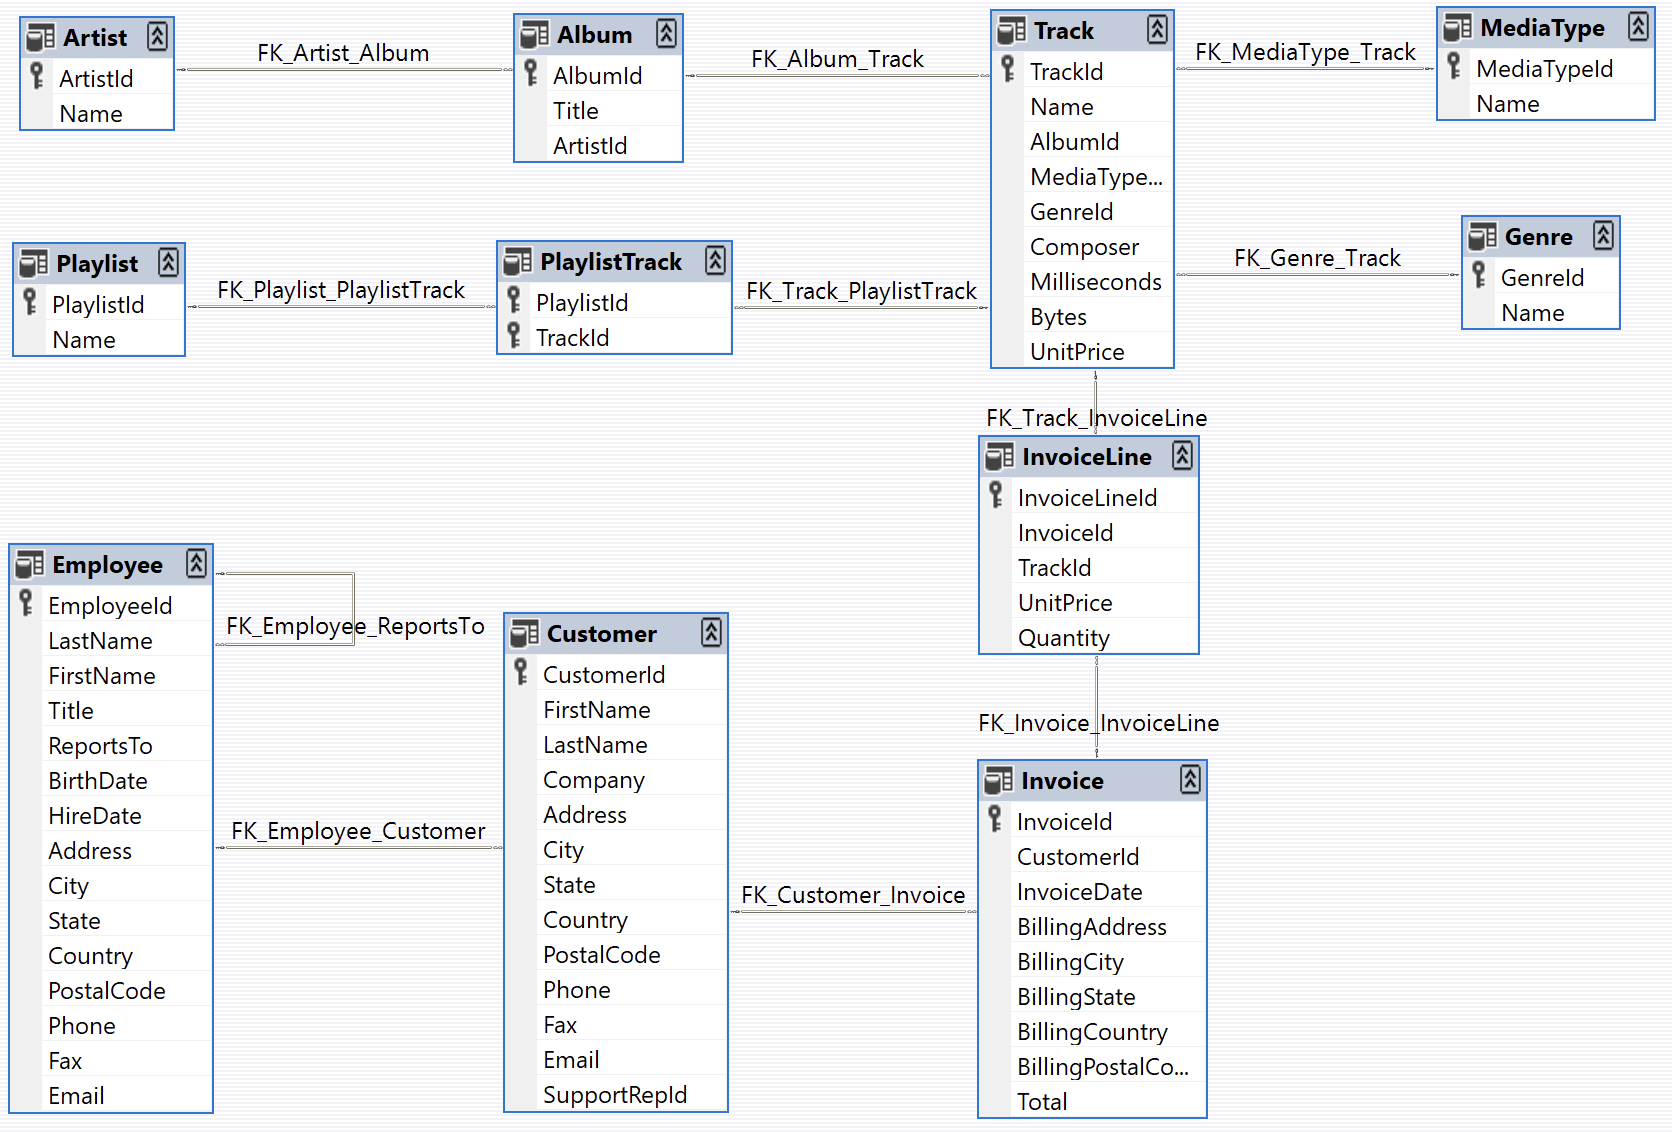

In [ ]:
Image('diagram.png')

In [ ]:
engine=create_engine('sqlite:///Chinook.sqlite')

SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
JOIN Album al ON a.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 5;
   ArtistId                     Name  TotalSales
0        90              Iron Maiden         140
1       150                       U2         107
2        50                Metallica          91
3        22             Led Zeppelin          87
4       113  Os Paralamas Do Sucesso          45


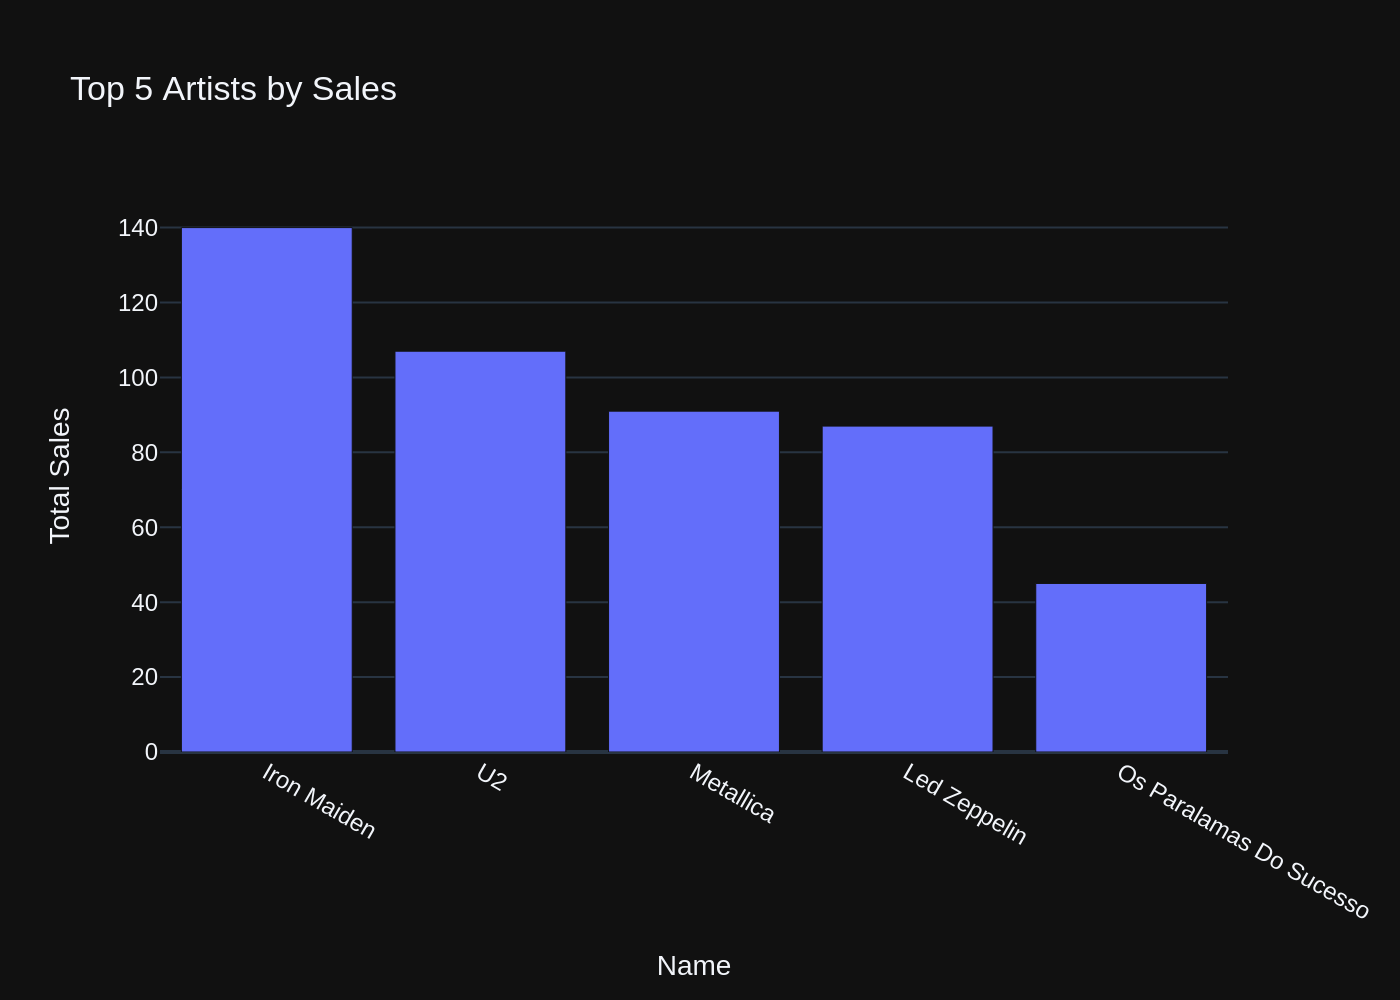

('SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales\nFROM Artist a\nJOIN Album al ON a.ArtistId = al.ArtistId\nJOIN Track t ON al.AlbumId = t.AlbumId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY a.ArtistId, a.Name\nORDER BY TotalSales DESC\nLIMIT 5;',
    ArtistId                     Name  TotalSales
 0        90              Iron Maiden         140
 1       150                       U2         107
 2        50                Metallica          91
 3        22             Led Zeppelin          87
 4       113  Os Paralamas Do Sucesso          45,
 None)

In [ ]:
vn.ask("WHat are top 5 artists by sales?")

In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

<IPython.core.display.Javascript object>

Your app is running at:
https://mwyh805swvs-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
